In [239]:
import numpy as np
np.random.seed(42)          
import pandas as pd  
import scipy.stats as scs
import scipy.optimize as sco             
import matplotlib.pyplot as plt   
!pip install yfinance --upgrade  
from scipy.stats import norm     
import seaborn as sns            
import yfinance as yf            
import seaborn as sns            
%matplotlib inline 
!pip install PyPortfolioOpt
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier

In [240]:
# Accessing 'UBER', 'DELL' ,'MRVL', 'ORCL', 'ADBE','HPQ' data from Yahoo Tech stock
# SONY	-Sony Group Corporation
# IBM	-International Business Machines Corporation
# HPQ- HP Inc.
# MRVL-Marvell Technology, Inc. 
# ADBE- Adobe Inc.
# ORCL- Oracle Corporation
portfolio_one=yf.download(['SONY', 'IBM' ,'MRVL', 'ORCL', 'ADBE','HPQ'],start="2010-01-01",end="2019-12-31")
portfolio_one=portfolio_one['Adj Close']
#checking the leading data of our dataset
portfolio_one.head()

[*********************100%***********************]  6 of 6 completed


,ADBE,HPQ,IBM,MRVL,ORCL,SONY
Date,,,,,,
2010-01-04,37.090000,15.282907,82.858452,18.145628,21.112114,27.051420
2010-01-05,37.700001,15.347010,81.857536,18.490763,21.086630,26.925257
2010-01-06,37.619999,15.204239,81.325783,18.654707,20.780779,26.898220
2010-01-07,36.889999,15.210064,81.044250,18.223272,20.712803,26.853168
2010-01-08,36.689999,15.323709,81.857536,18.430363,20.967691,27.402845


In [241]:
# Accessing 'UNH', 'JNJ' ,'PFE', 'AZN', 'MRNA','WST' data from Yahoo HealthCare
#WST	-West Pharmaceutical Services, Inc.
#MRK	Merck & Co., Inc.
#AZN	-AstraZeneca PLC
#PFE	-Pfizer Inc.
#JNJ -Johnson & Johnson
#UNH -UnitedHealth Group Incorporated
portfolio_two=yf.download (['UNH', 'JNJ' ,'PFE', 'AZN', 'MRK','WST'],start="2010-01-01",end="2019-12-31")
portfolio_two=portfolio_two['Adj Close']
#checking the leading data of our dataset
portfolio_two.head()

[*********************100%***********************]  6 of 6 completed


,AZN,JNJ,MRK,PFE,UNH,WST
Date,,,,,,
2010-01-04,13.732305,45.152042,22.677441,11.152849,26.124910,17.717703
2010-01-05,13.454242,44.628479,22.769337,10.993778,26.083481,17.493256
2010-01-06,13.347067,44.991486,23.075708,10.958423,26.340334,17.322683
2010-01-07,13.491891,44.670368,23.112476,10.917186,27.351196,17.376547
2010-01-08,13.549829,44.823948,23.100218,11.005561,27.094334,17.372061


,ADBE,HPQ,IBM,MRVL,ORCL,SONY
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.016313,0.004186,-0.012153,0.018842,-0.001208,-0.004675
2010-01-06,-0.002124,-0.009346,-0.006517,0.008827,-0.014611,-0.001005
2010-01-07,-0.019595,0.000383,-0.003468,-0.023399,-0.003276,-0.001676
2010-01-08,-0.005436,0.007444,0.009985,0.011300,0.012231,0.020263


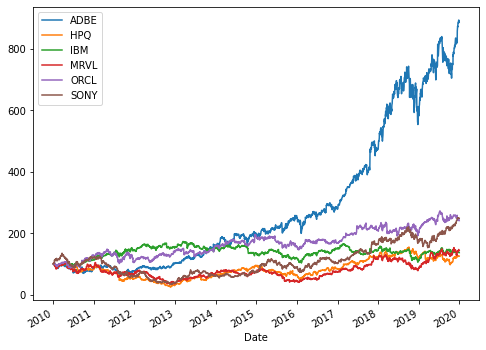

In [242]:
#calculate and plot the returns.
(portfolio_one / portfolio_one.iloc[0] * 100).plot(figsize=(8, 6))   # takes care of all plotting functions in pandas
rets_one = np.log(portfolio_one / portfolio_one.shift(1))
rets_one.head()

,AZN,JNJ,MRK,PFE,UNH,WST
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.020457,-0.011663,0.004044,-0.014366,-0.001587,-0.012749
2010-01-06,-0.007998,0.008101,0.013366,-0.003221,0.009799,-0.009799
2010-01-07,0.010792,-0.007163,0.001592,-0.003770,0.037659,0.003105
2010-01-08,0.004285,0.003432,-0.000531,0.008062,-0.009436,-0.000258


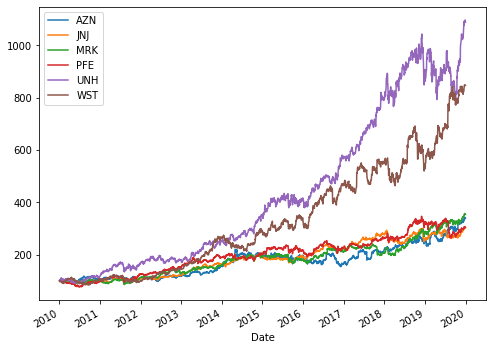

In [243]:
#calculate and plot the returns.
(portfolio_two / portfolio_two.iloc[0] * 100).plot(figsize=(8, 6))   # takes care of all plotting functions in pandas
rets_two = np.log(portfolio_two / portfolio_two.shift(1))
rets_two.head()

### **Annual mean returns for Portfolios**

In [244]:
#Anuual returns in 252 days working days for the first portofio.
rets_one.mean()*252 

ADBE    0.218591
HPQ     0.022408
IBM     0.031135
MRVL    0.036525
ORCL    0.088043
SONY    0.091035
dtype: float64

In [245]:
#Anuual returns in 252 days working days for the second portofio.
rets_two.mean()*252 

AZN    0.122372
JNJ    0.111330
MRK    0.126824
PFE    0.111144
UNH    0.239264
WST    0.214095
dtype: float64

### **Annualised covariance matrix for Portfolios**

In [246]:
#Annual covariance matrix in 252 working days for the first portofio..
rets_one.cov()*252  

,ADBE,HPQ,IBM,MRVL,ORCL,SONY
ADBE,0.079018,0.032719,0.022662,0.037215,0.031056,0.031932
HPQ,0.032719,0.101347,0.027236,0.037428,0.030922,0.030966
IBM,0.022662,0.027236,0.038566,0.023512,0.024022,0.021343
MRVL,0.037215,0.037428,0.023512,0.124288,0.030236,0.032172
ORCL,0.031056,0.030922,0.024022,0.030236,0.054657,0.025344
SONY,0.031932,0.030966,0.021343,0.032172,0.025344,0.105128


In [247]:
#Annual covariance matrix in 252 working days for the second portofio..
rets_two.cov()*252  

,AZN,JNJ,MRK,PFE,UNH,WST
AZN,0.049522,0.012845,0.016233,0.017062,0.014727,0.015469
JNJ,0.012845,0.022713,0.014995,0.014748,0.013921,0.013811
MRK,0.016233,0.014995,0.036877,0.020668,0.016071,0.015879
PFE,0.017062,0.014748,0.020668,0.033428,0.018353,0.015764
UNH,0.014727,0.013921,0.016071,0.018353,0.052062,0.019053
WST,0.015469,0.013811,0.015879,0.015764,0.019053,0.053001


### **Correlation for Portfolios**

In [248]:
#Anuual returns in 252 days working days for the first portofio.
rets_one.corr()

,ADBE,HPQ,IBM,MRVL,ORCL,SONY
ADBE,1.000000,0.365623,0.410518,0.375526,0.472564,0.350345
HPQ,0.365623,1.000000,0.435648,0.333489,0.415465,0.300001
IBM,0.410518,0.435648,1.000000,0.339610,0.523219,0.335195
MRVL,0.375526,0.333489,0.339610,1.000000,0.366845,0.281453
ORCL,0.472564,0.415465,0.523219,0.366845,1.000000,0.334336
SONY,0.350345,0.300001,0.335195,0.281453,0.334336,1.000000


In [249]:
#Anuual returns in 252 days working days for the second portofio.
rets_two.corr()

,AZN,JNJ,MRK,PFE,UNH,WST
AZN,1.000000,0.382997,0.379857,0.419346,0.290032,0.301944
JNJ,0.382997,1.000000,0.518116,0.535230,0.404826,0.398045
MRK,0.379857,0.518116,1.000000,0.588667,0.366775,0.359178
PFE,0.419346,0.535230,0.588667,1.000000,0.439929,0.374510
UNH,0.290032,0.404826,0.366775,0.439929,1.000000,0.362721
WST,0.301944,0.398045,0.359178,0.374510,0.362721,1.000000


### **Standard Deviation for Portfolios**

In [250]:
# Calculate the standard deviation for portfolio 1:
rets_one_1 = pd.DataFrame(rets_one.std()).rename(columns = {0:"Standard Deviation Portfolio 1"})
rets_one_1


,Standard Deviation Portfolio 1
ADBE,0.017708
HPQ,0.020054
IBM,0.012371
MRVL,0.022208
ORCL,0.014727
SONY,0.020425


In [251]:
# Calculate the standard deviation for portfolio 2:
rets_two_2 = pd.DataFrame(rets_two.std()).rename(columns = {0:"Standard Deviation Portfolio 2"})
rets_two_2


,Standard Deviation Portfolio 2
AZN,0.014018
JNJ,0.009494
MRK,0.012097
PFE,0.011517
UNH,0.014373
WST,0.014502


In [252]:
# Calculate the annualized standard deviation (252 trading days):
annualized_std_df = rets_one_1 * np.sqrt(252)

# Rename "Standard Deviation" column to "Annualized Standard_Deviation"
annualized_std_df.columns = ["Annualized Standard Deviation"]

# Make new dataframe with sorted data: 
annualized_std_df_sorted = annualized_std_df.sort_values("Annualized Standard Deviation", ascending=False)
annualized_std_df_sorted

,Annualized Standard Deviation
MRVL,0.352545
SONY,0.324235
HPQ,0.318350
ADBE,0.281102
ORCL,0.233789
IBM,0.196382


In [253]:
# Calculate the annualized standard deviation (252 trading days):
annualized_std_df = rets_two_2 * np.sqrt(252)

# Rename "Standard Deviation" column to "Annualized Standard_Deviation"
annualized_std_df.columns = ["Annualized Standard Deviation"]

# Make new dataframe with sorted data: 
annualized_std_df_sorted = annualized_std_df.sort_values("Annualized Standard Deviation", ascending=False)
annualized_std_df_sorted

,Annualized Standard Deviation
WST,0.230219
UNH,0.228171
AZN,0.222534
MRK,0.192035
PFE,0.182832
JNJ,0.150709


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f51d1661210>,
      dtype=object)

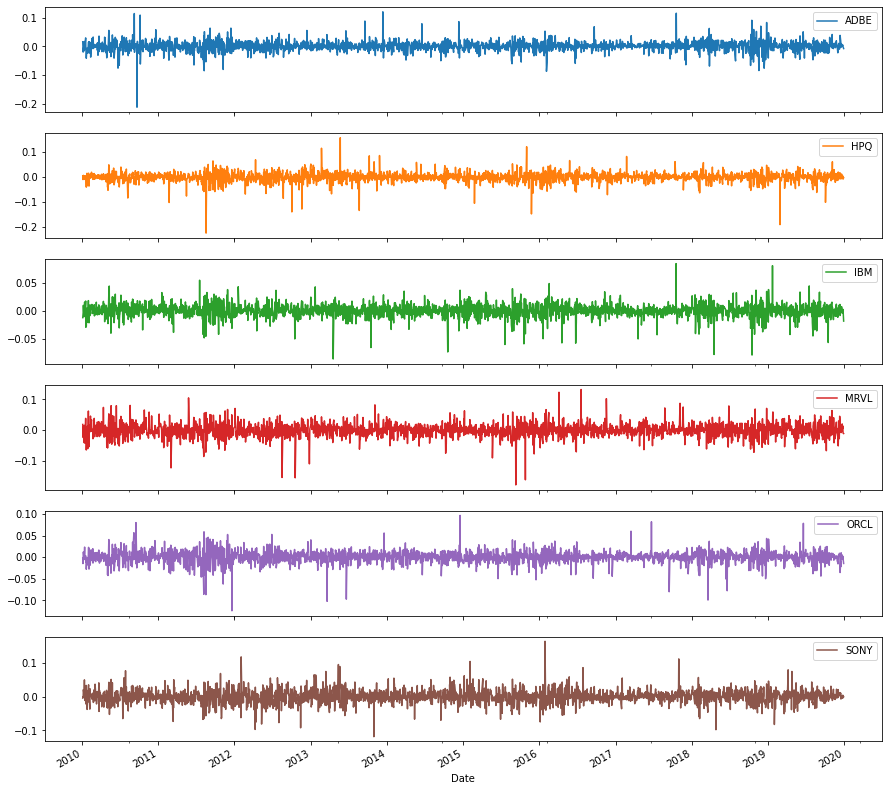

In [254]:
rets_one.plot(subplots=True,figsize=(15, 15))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f51d137d110>,
      dtype=object)

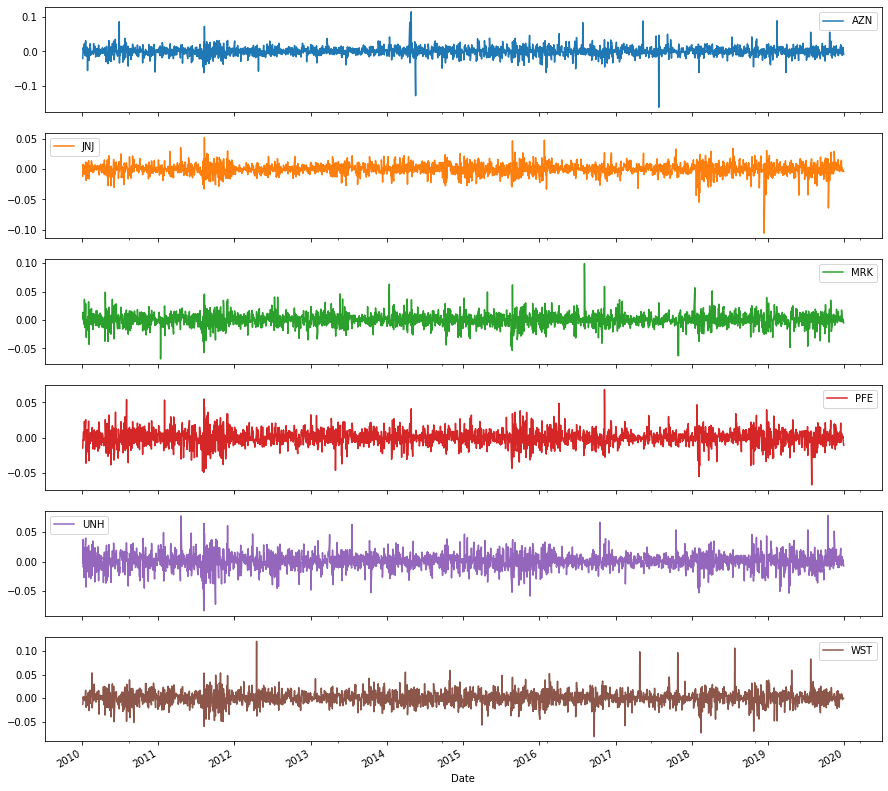

In [255]:
rets_two.plot(subplots=True,figsize=(15, 15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f51d1044790>,
      dtype=object)

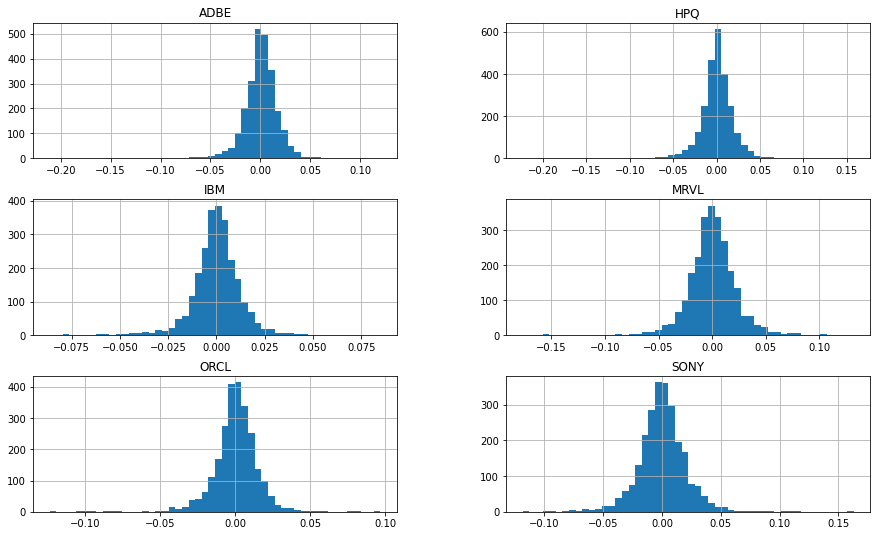

In [256]:
#plotting the histogram for log returns
rets_one.hist(bins=50, figsize=(15, 9))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f51d0f24550>,
      dtype=object)

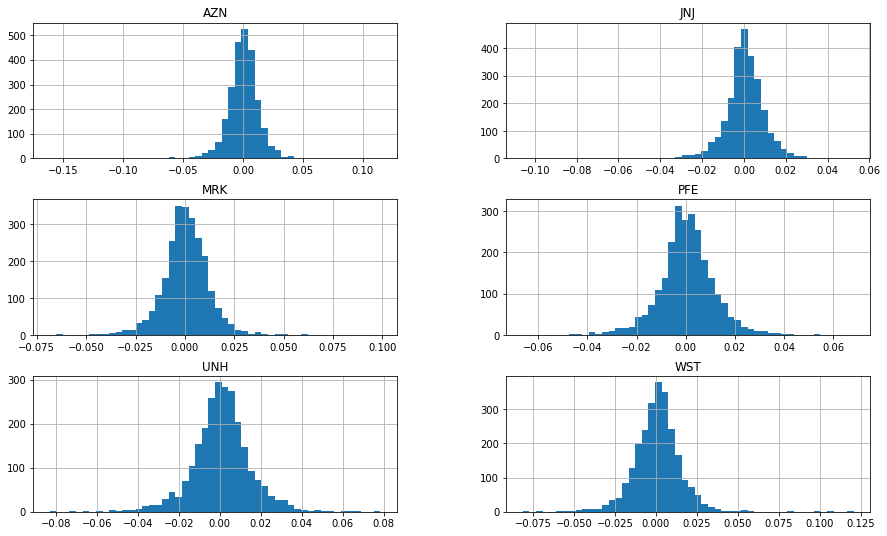

In [257]:
#plotting the histogram for log returns
rets_two.hist(bins=50, figsize=(15, 9))

In [258]:
def print_statistics(array):  
    ''' Prints selected statistics.
    Parameters
    ==========
    array: ndarray       (object to generate statistics on)
    '''
    sta = scs.describe(array)
    print ("%14s %15s" % ('statistic', 'value'))
    print (30 * "-")
    print ("%14s %15.5f" % ('size', sta[0]))
    print ("%14s %15.5f" % ('min', sta[1][0]))
    print ("%14s %15.5f" % ('max', sta[1][1]))
    print ("%14s %15.5f" % ('mean', sta[2]))
    print ("%14s %15.5f" % ('std', np.sqrt(sta[3])))
    print ("%14s %15.5f" % ('skew', sta[4]))
    print ("%14s %15.5f" % ('kurtosis', sta[5]))

In [259]:
symbols=['SONY', 'IBM' ,'MRVL', 'ORCL', 'ADBE','HPQ']
for sym in symbols:
    print ("\nResults for symbol %s" % sym)
    print (30 * "-")
    portfolio_one = np.array(rets_one[sym].dropna())
    print_statistics(portfolio_one)


Results for symbol SONY
------------------------------
     statistic           value
------------------------------
          size      2514.00000
           min        -0.11849
           max         0.16291
          mean         0.00036
           std         0.02042
          skew         0.17814
      kurtosis         4.65613

Results for symbol IBM
------------------------------
     statistic           value
------------------------------
          size      2514.00000
           min        -0.08642
           max         0.08493
          mean         0.00012
           std         0.01237
          skew        -0.58193
      kurtosis         6.57087

Results for symbol MRVL
------------------------------
     statistic           value
------------------------------
          size      2514.00000
           min        -0.17684
           max         0.13201
          mean         0.00014
           std         0.02221
          skew        -0.41869
      kurtosis         6.67

In [261]:
symbols_two=['UNH', 'JNJ' ,'PFE', 'AZN', 'MRK','WST']
for sym in symbols_two:
    print ("\nResults for symbol %s" % sym)
    print (30 * "-")
    portfolio_two = np.array(rets_two[sym].dropna())
    print_statistics(portfolio_two)


Results for symbol UNH
------------------------------
     statistic           value
------------------------------
          size      2514.00000
           min        -0.08303
           max         0.07844
          mean         0.00095
           std         0.01437
          skew        -0.04110
      kurtosis         2.89745

Results for symbol JNJ
------------------------------
     statistic           value
------------------------------
          size      2514.00000
           min        -0.10578
           max         0.05242
          mean         0.00044
           std         0.00949
          skew        -0.84131
      kurtosis         9.36031

Results for symbol PFE
------------------------------
     statistic           value
------------------------------
          size      2514.00000
           min        -0.06633
           max         0.06828
          mean         0.00044
           std         0.01152
          skew        -0.02240
      kurtosis         2.8442

### **Question 2**

In [390]:
portfolio_one=yf.download(['SONY', 'IBM' ,'MRVL', 'ORCL', 'ADBE','HPQ'],start="2010-01-01",end="2019-12-31")
portfolio_one=portfolio_one['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [391]:
portfolio_two=yf.download (['UNH', 'JNJ' ,'PFE', 'AZN', 'MRK','WST'],start="2010-01-01",end="2019-12-31")
portfolio_two=portfolio_two['Adj Close']

[*********************100%***********************]  6 of 6 completed


### **Random portfolio weight for portfolio one**

In [392]:
weights_one=np.random.random(6)  # A single randomly selected portfolio
weights_one=weights_one/np.sum(weights_one)   # weights must sum to 1
weights_one
def func_minimize_wts(weights_one):
  return np.sum(portfolio_one@weights_one)
bnds=tuple((0,1) for weights_one in range (6)) 
cons=({'type':'eq','fun':lambda weights_one:np.sum(weights_one)-1},{'type':'eq','fun':lambda weights_one:np.sum(portfolio_one@weights_one)-100000}) 
opts=sco.minimize(func_minimize_wts,6*[1./6,],method='SLSQP',bounds=bnds,constraints=cons)
weights_one=opts['x']

In [393]:
port_one=portfolio_one@weights_one

### **Random portfolio weight for portfolio two**

In [394]:
weights_two=np.random.random(6)  # A single randomly selected portfolio
weights_two=weights_two/np.sum(weights_two)   # weights must sum to 1
weights_two
def func_minimize_wts2(weights_two):
  return np.sum(portfolio_two@weights_two)
bnds=tuple((0,1) for weights_two in range (6)) 
cons=({'type':'eq','fun':lambda weights_two:np.sum(weights_two)-1},{'type':'eq','fun':lambda weights_two:np.sum(portfolio_two@weights_two)-100000}) 
opts=sco.minimize(func_minimize_wts2,6*[1./6,],method='SLSQP',bounds=bnds,constraints=cons)
weights_two=opts['x']

In [395]:
port_two=portfolio_two@weights_two

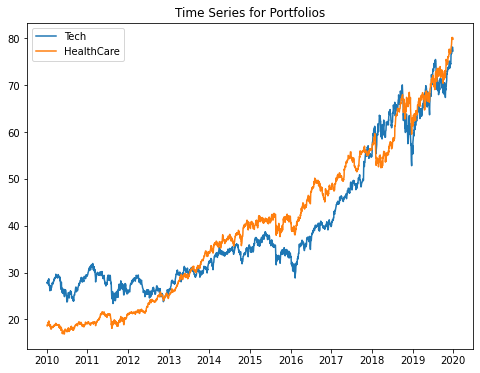

In [396]:
#plot time series for the portfolios
plt.figure(figsize=(8,6))
plt.title('Time Series for Portfolios')
plt.plot(port_one.index,port_one,label='Tech')
plt.plot(port_two.index,port_two,label='HealthCare')
plt.legend()

,ADBE,HPQ,IBM,MRVL,ORCL,SONY
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.016313,0.004186,-0.012154,0.018842,-0.001208,-0.004675
2010-01-06,-0.002124,-0.009347,-0.006517,0.008827,-0.014611,-0.001005
2010-01-07,-0.019595,0.000383,-0.003467,-0.023398,-0.003276,-0.001676
2010-01-08,-0.005436,0.007444,0.009985,0.011300,0.012230,0.020263


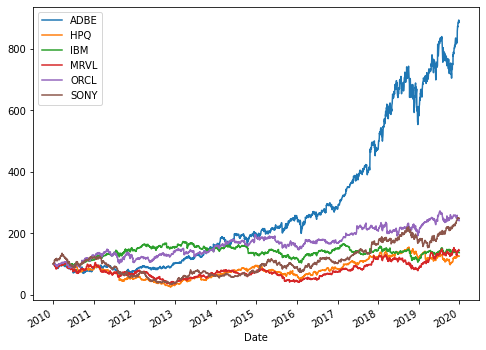

In [283]:
#Calculate and plot returns for data1
(portfolio_one / portfolio_one.iloc[0] * 100).plot(figsize=(8, 6))  
returns_one = np.log(portfolio_one / portfolio_one.shift(1))
returns_one.head()

In [284]:
returns_one.cov()*252  # Annualised covariance matrix for data1

,ADBE,HPQ,IBM,MRVL,ORCL,SONY
ADBE,0.079018,0.032719,0.022662,0.037215,0.031056,0.031931
HPQ,0.032719,0.101347,0.027236,0.037428,0.030922,0.030966
IBM,0.022662,0.027236,0.038566,0.023512,0.024022,0.021343
MRVL,0.037215,0.037428,0.023512,0.124288,0.030236,0.032172
ORCL,0.031056,0.030922,0.024022,0.030236,0.054657,0.025343
SONY,0.031931,0.030966,0.021343,0.032172,0.025343,0.105128


,AZN,JNJ,MRK,PFE,UNH,WST
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.020457,-0.011664,0.004045,-0.014366,-0.001588,-0.012749
2010-01-06,-0.007997,0.008101,0.013365,-0.003221,0.009800,-0.009799
2010-01-07,0.010792,-0.007163,0.001592,-0.003770,0.037659,0.003105
2010-01-08,0.004284,0.003432,-0.000531,0.008062,-0.009436,-0.000258


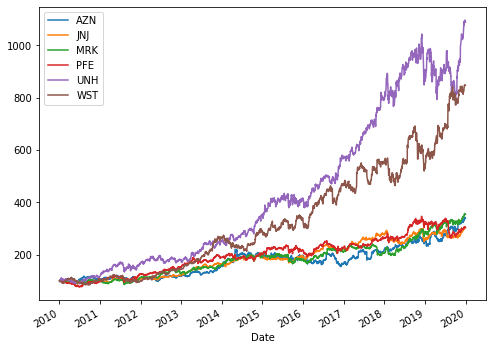

In [285]:
#Calculate and plot returns for data1
(portfolio_two / portfolio_two.iloc[0] * 100).plot(figsize=(8, 6))  
returns_two = np.log(portfolio_two / portfolio_two.shift(1))
returns_two.head()

In [286]:
returns_two.cov()*252  # Annualised covariance matrix for data1

,AZN,JNJ,MRK,PFE,UNH,WST
AZN,0.049522,0.012845,0.016233,0.017062,0.014727,0.015469
JNJ,0.012845,0.022713,0.014995,0.014748,0.013921,0.013811
MRK,0.016233,0.014995,0.036877,0.020668,0.016071,0.015879
PFE,0.017062,0.014748,0.020668,0.033428,0.018353,0.015764
UNH,0.014727,0.013921,0.016071,0.018353,0.052062,0.019053
WST,0.015469,0.013811,0.015879,0.015764,0.019053,0.053001


In [522]:
# Randomly weighted portfolio1's variance, volatility, expected returns
var1=wts.T@(returns_one.cov()*252@wts)  # variance  
EpR1=np.sum(returns_one.mean()*wts)*252  # Expected portfolio return
std1=np.sqrt(var1)  # std/volatility
print("variance: ", var1,"; Expected portfolio return: ", EpR1,"; Volatility: ",std1)

variance:  0.03685701276363154 ; Expected portfolio return:  0.07127978159907371 ; Volatility:  0.1919818032096572


In [524]:
# Randomly weighted portfolio1's variance, volatility, expected returns
var2=wts.T@(returns_two.cov()*252@wts)  # variance  
EpR2=np.sum(returns_two.mean()*wts)*252  # Expected portfolio return
std2=np.sqrt(var2)  # std/volatility
print("variance: ", var2,"; Expected portfolio return: ", EpR2,"; Volatility: ",std2)

variance:  0.023045507536277793 ; Expected portfolio return:  0.17609888288538353 ; Volatility:  0.15180746864458874


### **Question 3**

[*********************100%***********************]  6 of 6 completed


,ADBE,HPQ,IBM,MRVL,ORCL,SONY
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.016313,0.004186,-0.012154,0.018842,-0.001208,-0.004675
2010-01-06,-0.002124,-0.009347,-0.006517,0.008827,-0.014611,-0.001004
2010-01-07,-0.019595,0.000383,-0.003468,-0.023398,-0.003276,-0.001676
2010-01-08,-0.005436,0.007443,0.009985,0.011299,0.012230,0.020263
...,...,...,...,...,...,...
2015-12-23,0.009336,0.007689,0.004413,0.029514,0.009249,0.013083
2015-12-24,-0.004233,-0.001704,-0.002095,0.008909,0.002164,0.003244
2015-12-28,-0.001061,-0.008562,-0.004640,-0.014517,-0.005962,-0.001215


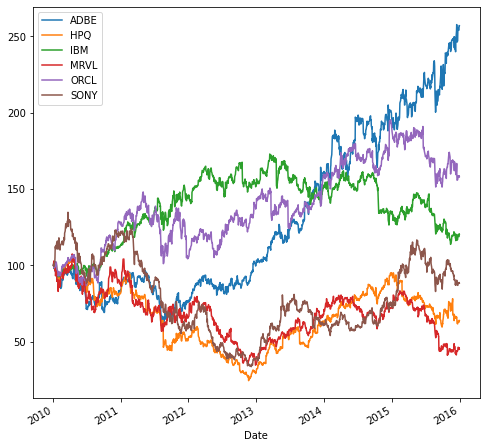

In [398]:
#Downloading the data for the tech portfolio
portfolio_one_2015=yf.download (['SONY', 'IBM' ,'MRVL', 'ORCL', 'ADBE','HPQ'],start="2010-01-01",end="2015-12-31") 
#Setting the close price of the tech portfolio
portfolio_one_2015=portfolio_one_2015['Adj Close']

#Calculating and plotting the returns for the tech portfolio
(portfolio_one_2015 / portfolio_one_2015.iloc[0] * 100).plot(figsize=(8, 8))  
returns_one_2015 = np.log(portfolio_one_2015 / portfolio_one_2015.shift(1))
returns_one_2015

[*********************100%***********************]  6 of 6 completed


,AZN,JNJ,MRK,PFE,UNH,WST
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.020457,-0.011663,0.004044,-0.014366,-0.001587,-0.012749
2010-01-06,-0.007997,0.008100,0.013366,-0.003221,0.009800,-0.009799
2010-01-07,0.010792,-0.007162,0.001592,-0.003770,0.037659,0.003105
2010-01-08,0.004284,0.003432,-0.000531,0.008063,-0.009436,-0.000259
...,...,...,...,...,...,...
2015-12-23,0.021730,0.007565,0.016749,0.001230,0.010587,-0.002459
2015-12-24,0.004993,0.002220,-0.002457,0.001841,-0.002953,0.011425
2015-12-28,-0.001173,-0.004832,-0.000189,-0.006150,-0.000084,0.007437


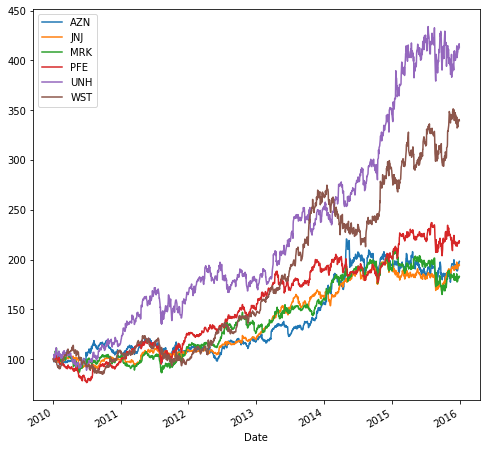

In [431]:
#Downloading the data for the HealthCare portfolio
portfolio_two_2015=yf.download (['UNH', 'JNJ' ,'PFE', 'AZN', 'MRK','WST'],start="2010-01-01",end="2015-12-31") 
#Setting the close price of the HealthCare portfolio
portfolio_two_2015=portfolio_two_2015['Adj Close']

#Calculating and plotting the returns for the tech portfolio
(portfolio_two_2015 / portfolio_two_2015.iloc[0] * 100).plot(figsize=(8, 8))  
returns_two_2015 = np.log(portfolio_two_2015 / portfolio_two_2015.shift(1))
returns_two_2015

### **Changing prets,pvols to the real stock inputs and minimizing var and Sharpe Ratio for the tech portfolio.**

In [417]:
prets_one=[]
pvols_one=[]

In [418]:
for p in range(2500):
  weights_one_2015=np.random.random(6)
  weights_one_2015=weights_one_2015/np.sum(weights_one_2015)
  prets_one.append(np.sum(returns_one_2015.mean()*weights_one_2015)*252)
  pvols_one.append(np.sqrt(weights_one_2015.T@(returns_one_2015.cov()*252@weights_one_2015)))
prets_one=np.array(prets_one)  # Change from prets as list to prets as numpy array
pvols_one=np.array(pvols_one)

In [419]:
# Function to calculate statistics of rets and vols - the new prets,pvols
def stats(weights_one_2015):
  prets_one=np.sum(returns_one_2015.mean()*weights_one_2015)*252
  pvols_one=np.sqrt(weights_one_2015.T@(returns_one_2015.cov()*252@weights_one_2015))
  srs_one=prets_one/pvols_one  # Sharpe ratios (Sharpe ratio is return/volatility(std))
  return np.array([prets_one,pvols_one,srs_one])

In [420]:
# Functions that we will minimize
def func_to_maximize_sharpe(weights_one_2015):
  return(-stats(weights_one_2015)[2])   # Note that minimizing minus the ratio gives us the max on changin sign
def func_to_minimize_var(weights_one_2015):
  return((stats(weights_one_2015)[1])**2)
def func_to_minimize_std(weights_one_2015):
  return(stats(weights_one_2015)[1])

In [421]:
# Set up constraints dictionary and bounds for variables for use in optimizer
cons=({'type': 'eq','fun': lambda x: np.sum(x)-1})  # equality constraint components of x add up to 1
bnds=tuple((0,1) for x in range(6))   # components of x between 0 and 1

### **Maximizing Sharpe, minimizing -Sharpe, details in variable opts**

In [422]:
# Maximize Sharpe ratio
opts=sco.minimize(func_to_maximize_sharpe,6*[1./6,],method='SLSQP',bounds=bnds,constraints=cons)

In [423]:
%%time
# Minimize variance
optv=sco.minimize(func_to_minimize_var,6*[1./6,],method='SLSQP',bounds=bnds,constraints=cons)

CPU times: user 176 ms, sys: 0 ns, total: 176 ms
Wall time: 176 ms


### **Find all optimal returns for given volatilities minimizing vol or std - EFFICIENT FRONTIER - details in variable res, EF in tvols, trets**

In [424]:

trets_one=np.linspace(0.0,0.25,50)
tvols_one=[]
for tret in trets_one:
  cons=({'type': 'eq','fun': lambda x: stats(x)[0]-tret},
        {'type': 'eq','fun': lambda x: np.sum(x)-1})
  res=sco.minimize(func_to_minimize_std,6*[1./6,],method='SLSQP',bounds=bnds,constraints=cons)
  tvols_one.append(res['fun'])
tvols_one=np.array(tvols_one)
# Picks out the efficient fronties (evols,erets) - argmin is the index of the vertex of the 
# hyperbola/parabola
ind=np.argmin(tvols_one)
evols_one=tvols_one[ind:]
erets_one=trets_one[ind:]
r0=.02
slopes=(erets_one-r0)/evols_one
def cml(x,slope_max,r0):
  return r0+slope_max*x
sgpts=np.linspace(0,0.4,100)

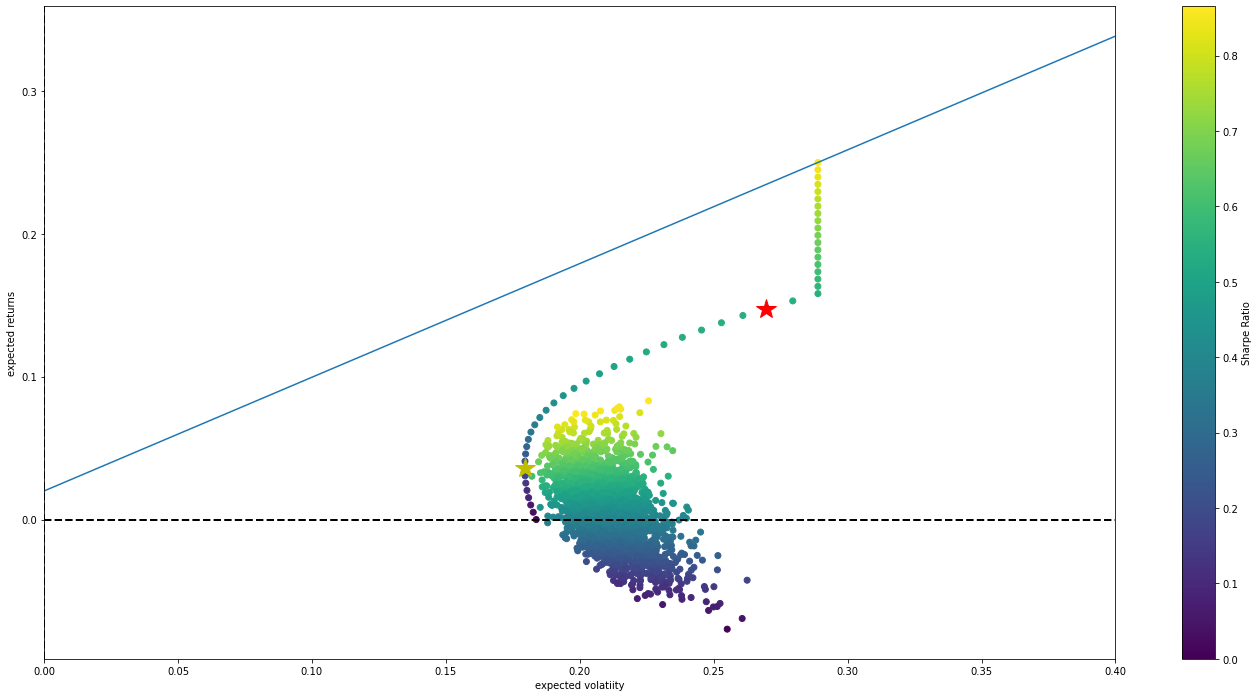

In [425]:
plt.figure(figsize=(24,12))
plt.scatter(pvols_one,prets_one,c=prets_one/pvols_one,marker='o')
plt.scatter(tvols_one,trets_one,c=trets_one/tvols_one,marker='o')
plt.plot(sgpts,cml(sgpts,slopes[np.argmax(slopes)],0.02))
plt.plot(stats(opts['x'])[1],stats(opts['x'])[0],'r*',markersize=20.0)  # portfolio with min variance
plt.plot(stats(optv['x'])[1],stats(optv['x'])[0],'y*',markersize=20.0)  # portfolio with min variance
plt.grid='true'
plt.xlim(0.0,0.4)
plt.xlabel('expected volatiity')
plt.ylabel('expected returns')
plt.colorbar(label='Sharpe Ratio')
plt.axhline(0,color='k',ls='--',lw=2.0)
plt.axvline(0,color='k',ls='--',lw=2.0)

### **Changing prets,pvols to the real stock inputs and minimizing var and Sharpe Ratio for the HealthCare portfolio.**

In [489]:
p_rets_two = [] # Define an empty list for portfolio returns
p_vols_two = [] # Define an empty list for portfolio volatility

for p in range(10000): #run a loop 10 000 times
  wts=np.random.random(6) #random numbers for weights
  wts=wts/np.sum(wts)
  p_rets_two.append(np.sum(returns_two_2015.mean()*wts)*252)
  p_vols_two.append(np.sqrt(wts.T@(returns_two_2015.cov()*252@wts)))

In [490]:
# Change from list to array 
p_rets_two=np.array(p_rets_two)  
p_vols_two=np.array(p_vols_two)

In [491]:
# Function to calculate statistics of returns1 and volatility - the new p_rets1,p_vols1
def stats(wts):
  p_rets_two=np.sum(returns_two_2015.mean()*wts)*252
  p_vols_two=np.sqrt(wts.T@(returns_two_2015.cov()*252@wts))
  srs=(p_rets_two-0.02)/p_vols_two  # Sharpe ratios (Sharpe ratio is return/volatility(std))
  return np.array([p_rets_two,p_vols_two,srs])

# Functions that we will minimize
def func_to_maximize_sharpe(wts):
  return(-stats(wts)[2])   # Note that minimizing minus the ratio gives us the max on changin sign
def func_to_minimize_var(wts):
  return((stats(wts)[1])**2)# Picks out the efficient fronties (evols,erets) - argmin is the index of the vertex of the 

def func_to_minimize_std(wts):
  return(stats(wts)[1])  

def cml(x,slope_max,r0):
  return r0+slope_max*x  

In [492]:
# Set up constraints dictionary and bounds for variables for use in optimizer
cons=({'type': 'eq','fun': lambda x: np.sum(x)-1})  # equality constraint components of x add up to 1
bnds=tuple((0,1) for x in range(6))   # components of x between 0 and 1

In [493]:
# Maximize Sharpe ratio
opts=sco.minimize(func_to_maximize_sharpe,6*[1./6,],method='SLSQP',bounds=bnds,constraints=cons)
# Minimize variance
optv=sco.minimize(func_to_minimize_var,6*[1./6,],method='SLSQP',bounds=bnds,constraints=cons)

In [494]:
trets_two=np.linspace(0.0,0.25,50)
tvols_two=[]
for tret in trets_two:
  cons=({'type': 'eq','fun': lambda x: stats(x)[0]-tret},
        {'type': 'eq','fun': lambda x: np.sum(x)-1})
  res=sco.minimize(func_to_minimize_std,6*[1./6,],method='SLSQP',bounds=bnds,constraints=cons)
  tvols_two.append(res['fun'])
tvols_two=np.array(tvols_two)

In [495]:
# Picks out the efficient fronties (evols,erets) - argmin is the index of the vertex of the 
# hyperbola/parabola
ind=np.argmin(tvols_two)
evols_two=tvols_two[ind:]
erets_two=trets_two[ind:]
r0=.02
slopes=(erets_two-r0)/evols_two
x=np.linspace(0,0.4,100)

Text(0.5, 1.0, 'Efficient Frontier - red star opt Sharpe Ratio')

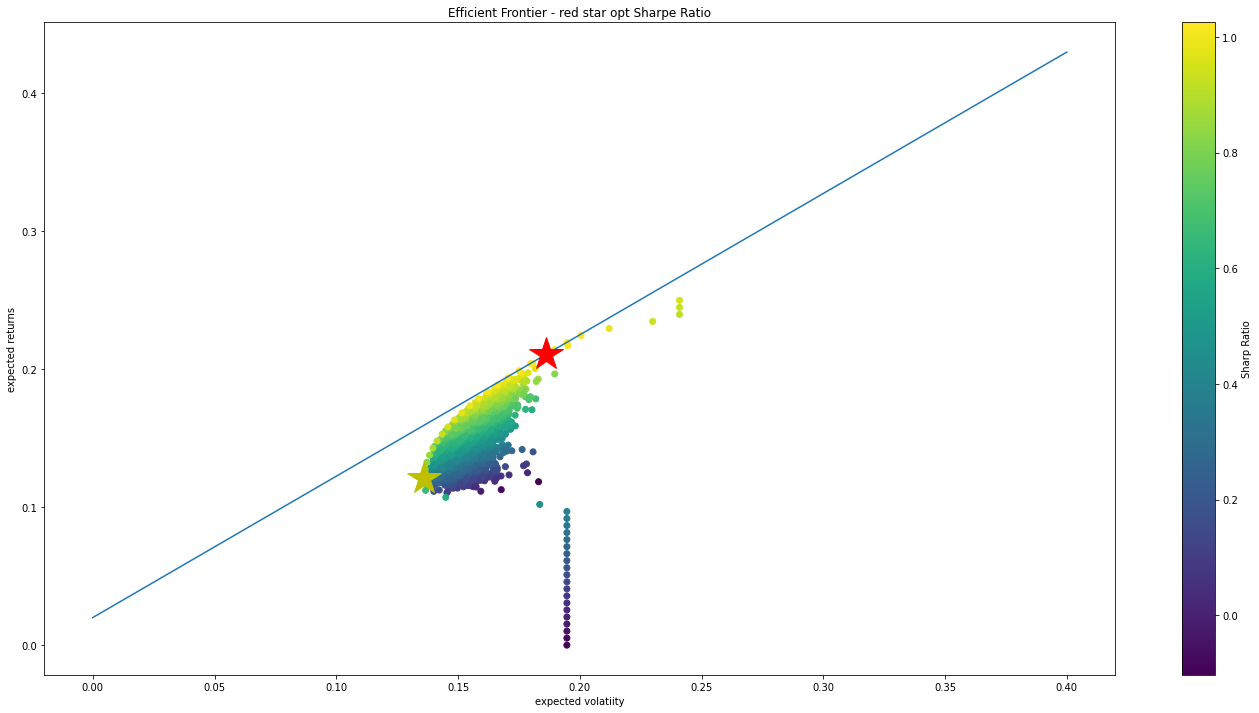

In [496]:
plt.figure(figsize=(24,12))
plt.scatter(p_vols_two,p_rets_two,c=(p_rets_two-0.02)/p_vols_two,marker='o')
plt.scatter(tvols_two,trets_two,c=(trets_two-0.02)/tvols_two,marker='o')
plt.plot(x,cml(x,slopes[np.argmax(slopes)],0.02))
plt.plot(stats(opts['x'])[1],stats(opts['x'])[0],'r*',markersize=35.0)  # portfolio with highest Sharpe ratio
plt.plot(stats(optv['x'])[1],stats(optv['x'])[0],'y*',markersize=35.0)  # portfolio with min variance
plt.grid=True
plt.xlabel('expected volatiity')
plt.ylabel('expected returns')
plt.colorbar(label='Sharp Ratio')
plt.title('Efficient Frontier - red star opt Sharpe Ratio')

### **Question 4**

In [525]:
#Downloading the data for the tech portfolio
portfolio_one_2016=yf.download (['SONY', 'IBM' ,'MRVL', 'ORCL', 'ADBE','HPQ'],start="2010-01-01",end="2016-12-31") 
#Setting the close price of the tech portfolio
portfolio_one_2016=portfolio_one_2016['Adj Close']
#Calculating and plotting the returns for the tech portfolio
weights_one_2016=np.random.random(6)  # A single randomly selected portfolio
weights_one_2016=weights_one_2016/np.sum(weights_one_2016)   # weights must sum to 1
weights_one_2016
def func_minimize_wts(weights_one_2016):
  return np.sum(portfolio_one_2016@weights_one_2016)
bnds=tuple((0,1) for weights_one_2016 in range (6)) 
cons=({'type':'eq','fun':lambda weights_one_2016:np.sum(weights_one_2016)-1},{'type':'eq','fun':lambda weights_one_2016:np.sum(portfolio_one_2016@weights_one_2016)-100000}) 
opts=sco.minimize(func_minimize_wts,6*[1./6,],method='SLSQP',bounds=bnds,constraints=cons)
weights_one_2016=opts['x']

[*********************100%***********************]  6 of 6 completed


In [526]:
#Downloading the data for the HealthCare portfolio
portfolio_two_2016=yf.download (['UNH', 'JNJ' ,'PFE', 'AZN', 'MRK','WST'],start="2010-01-01",end="2016-12-31") 
#Setting the close price of the HealthCare portfolio
portfolio_two_2016=portfolio_two_2016['Adj Close']
#Calculating and plotting the returns for the tech portfolio
weights_two_2016=np.random.random(6)  # A single randomly selected portfolio
weights_two_2016=weights_two_2016/np.sum(weights_two_2016)   # weights must sum to 1
weights_two_2016
def func_minimize_wts2(weights_two_2016):
  return np.sum(portfolio_two_2016@weights_two_2016)
bnds=tuple((0,1) for weights_two_2016 in range (6)) 
cons=({'type':'eq','fun':lambda weights_two_2016:np.sum(weights_two_2016)-1},{'type':'eq','fun':lambda weights_two_2016:np.sum(portfolio_two_2016@weights_two_2016)-100000}) 
opts=sco.minimize(func_minimize_wts2,6*[1./6,],method='SLSQP',bounds=bnds,constraints=cons)
weights_two_2016=opts['x']

[*********************100%***********************]  6 of 6 completed


In [529]:
port_one_2016=portfolio_one_2016@weights_one_2016
port_two_2016=portfolio_two_2016@weights_two_2016

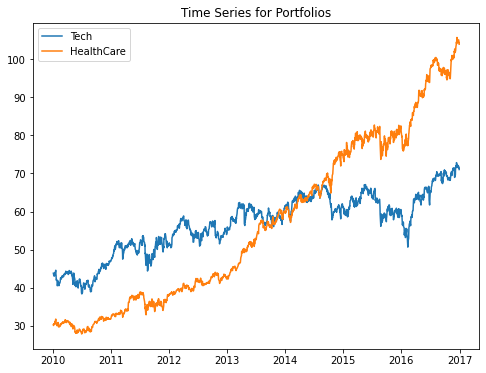

In [530]:
#plot time series for the portfolios
plt.figure(figsize=(8,6))
plt.title('Time Series for Portfolios')
plt.plot(port_one_2016.index,port_one_2016,label='Tech')
plt.plot(port_two_2016.index,port_two_2016,label='HealthCare')
plt.legend()

,ADBE,HPQ,IBM,MRVL,ORCL,SONY
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.016313,0.004185,-0.012154,0.018842,-0.001208,-0.004674
2010-01-06,-0.002124,-0.009347,-0.006517,0.008827,-0.014611,-0.001004
2010-01-07,-0.019595,0.000383,-0.003467,-0.023399,-0.003276,-0.001677
2010-01-08,-0.005436,0.007443,0.009985,0.011299,0.012230,0.020263


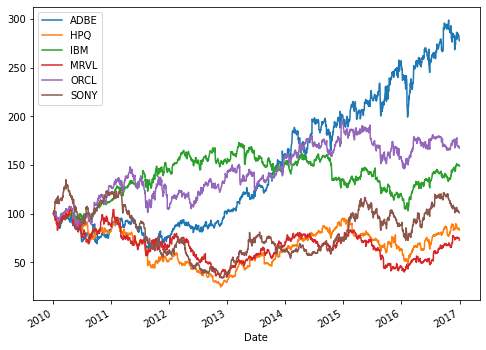

In [531]:
#Calculate and plot returns for data1
(portfolio_one_2016 / portfolio_one_2016.iloc[0] * 100).plot(figsize=(8, 6))  
returns_one_2016 = np.log(portfolio_one_2016 / portfolio_one_2016.shift(1))
returns_one_2016.head()

,ADBE,HPQ,IBM,MRVL,ORCL,SONY
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.016313,0.004185,-0.012154,0.018842,-0.001208,-0.004674
2010-01-06,-0.002124,-0.009347,-0.006517,0.008827,-0.014611,-0.001004
2010-01-07,-0.019595,0.000383,-0.003467,-0.023399,-0.003276,-0.001677
2010-01-08,-0.005436,0.007443,0.009985,0.011299,0.012230,0.020263


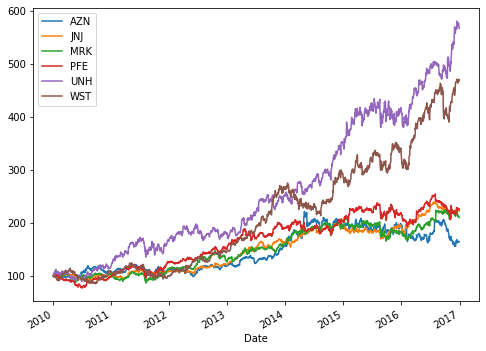

In [532]:
#Calculate and plot returns for data1
(portfolio_two_2016 / portfolio_two_2016.iloc[0] * 100).plot(figsize=(8, 6))  
returns_two_2016 = np.log(portfolio_two_2016 / portfolio_two_2016.shift(1))
returns_one_2016.head()

In [533]:
# Randomly weighted portfolio1's variance, volatility, expected returns
var1_2016=wts.T@(returns_one_2016.cov()*252@wts)  # variance  
EpR1_2016=np.sum(returns_one_2016.mean()*wts)*252  # Expected portfolio return
std1_2016=np.sqrt(var1_2016)  # std/volatility
print("variance: ", var1_2016,"; Expected portfolio return: ", EpR1_2016,"; Volatility: ",std1_2016)

variance:  0.039900098017800964 ; Expected portfolio return:  0.032271082066252406 ; Volatility:  0.19975008890561466


In [534]:
# Randomly weighted portfolio1's variance, volatility, expected returns
var2_2016=wts.T@(returns_two_2016.cov()*252@wts)  # variance  
EpR2_2016=np.sum(returns_two_2016.mean()*wts)*252  # Expected portfolio return
std2_2016=np.sqrt(var2_2016)  # std/volatility
print("variance: ", var2_2016,"; Expected portfolio return: ", EpR2_2016,"; Volatility: ",std2_2016)

variance:  0.024927024192181155 ; Expected portfolio return:  0.17366082098073946 ; Volatility:  0.1578829445892784
